## Importació de llibreries i funcions pròpies

In [1]:
import pandas as pd
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, comptatge_i_percentatge_cat, mitjana_i_std_num
from listas import num_var_pes, cat_var_pes

## Càrrega i segmentació de les dades

In [2]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)]
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) &
           (taula['P diagnosticada'] == 1.0)]
TOTAL = taula

## Anàlisi descriptiva de les dades 

### Comptatges i percentatges de variables categòriques per grup


In [3]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var_pes)

+---------------------------------------+--------------+---------------+------------+--------------+
|                Columna                |  DataFrame   |     Valor     | Comptatges | Percentatges |
+---------------------------------------+--------------+---------------+------------+--------------+
| Pèrdua pes entre ingressos categòrica |    AMB_PA    | No disponible |     16     |    88.89%    |
|                                       |              |      0 kg     |     2      |    11.11%    |
|                                       |              |     1-3 kg    |     0      |    0.00%     |
|                                       |              |     3-6 kg    |     0      |    0.00%     |
|                                       |              |    6-10 kg    |     0      |    0.00%     |
|                                       |              |     >10 kg    |     0      |    0.00%     |
|                                       |              |               |            |      

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [4]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_var_pes)

+----------------------------+--------------+---------+---------------------+
|          Columna           |  DataFrame   | Mitjana | Desviació Estàndard |
+----------------------------+--------------+---------+---------------------+
|      Pèrdua pes total      |    AMB_PA    |   3.04  |         6.05        |
|                            |              |         |                     |
|      Pèrdua pes total      | AMB_PA_MECVV |  13.70  |        23.73        |
|                            |              |         |                     |
|      Pèrdua pes total      |   SENSE_PA   |  -7.26  |        23.76        |
|                            |              |         |                     |
|      Pèrdua pes total      |    TOTAL     |   1.32  |        18.02        |
|                            |              |         |                     |
| Pèrdua pes entre ingressos |    AMB_PA    |   0.00  |         0.00        |
|                            |              |         |         

C:\Users\maria\PycharmProjects\practicum\auxiliary_functions.py:1118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col],


## Pèrdua de pes entre ingressos (%)

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.0673
P-value: 0.7953
---
Grup: Desconegut
Chi-squared: 0.7602
P-value: 0.3833
---
Grup: SENSE_PA
Chi-squared: 0.0699
P-value: 0.7915
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


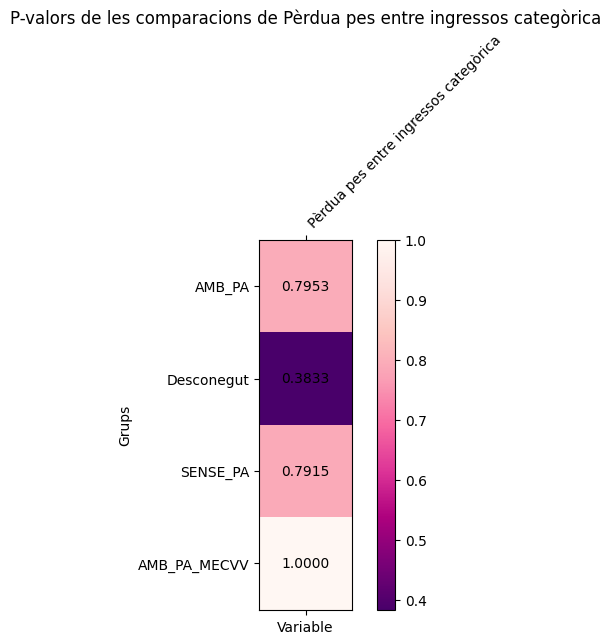

{'AMB_PA': 0.7952978836076402,
 'Desconegut': 0.38327188651703736,
 'SENSE_PA': 0.7915487896423128,
 'AMB_PA_MECVV': 1.0}

In [5]:
test_indepe_bin_plot(data_1= TOTAL['split_database'], data_2= TOTAL['Pèrdua pes entre ingressos categòrica'])

## Pèrdua de pes entre ingressos (mitjana i SD)

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i SENSE_PA
No hi ha prou dades per comparar TOTAL i AMB_PA
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i SENSE_PA
No hi ha prou dades per comparar TOTAL i TOTAL


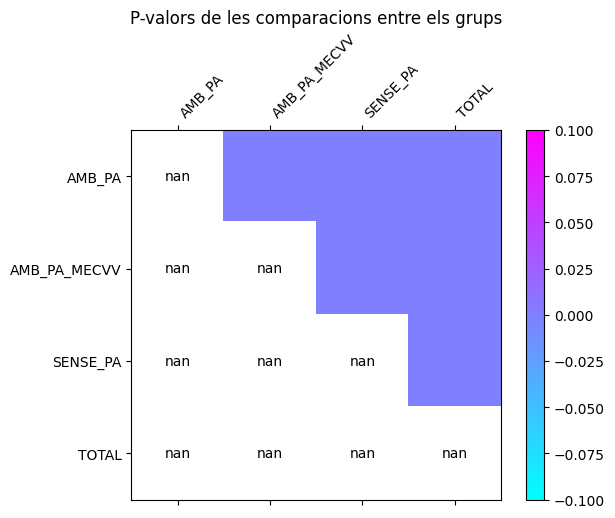

In [6]:
test_indepe_plot({'AMB_PA': AMB_PA['Pèrdua pes entre ingressos'], 'AMB_PA_MECVV': AMB_PA_MECVV['Pèrdua pes entre ingressos'], 'SENSE_PA': SENSE_PA['Pèrdua pes entre ingressos'], 'TOTAL': TOTAL['Pèrdua pes entre ingressos']})

## Pèrdua de pes total

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


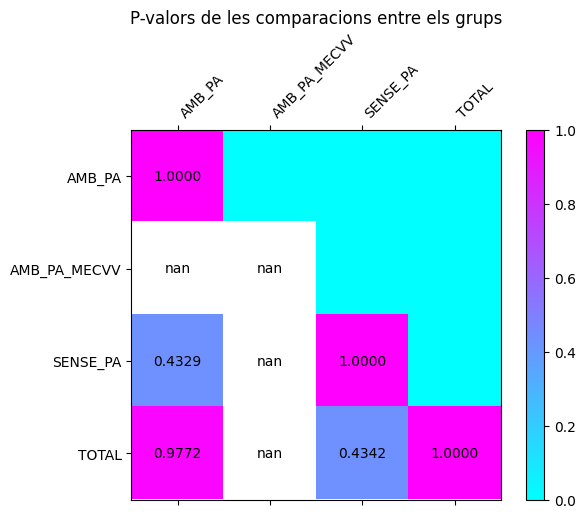

In [7]:
test_indepe_plot({'AMB_PA': AMB_PA['Pèrdua pes total'], 'AMB_PA_MECVV': AMB_PA_MECVV['Pèrdua pes total'], 'SENSE_PA': SENSE_PA['Pèrdua pes total'], 'TOTAL': TOTAL['Pèrdua pes total']})